In [2]:
# import morphine
import webbpsf
import poppy # need development version to work with synphot and webbpsf
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import CenteredNorm
from scipy.interpolate import RectBivariateSpline
mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams["font.family"] = "Times New Roman"
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-051 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-055
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [4]:
niriss = webbpsf.NIRISS()
niriss.filter = "F380M"
niriss.pupil_mask = "MASK_NRM"
niriss.jither = None

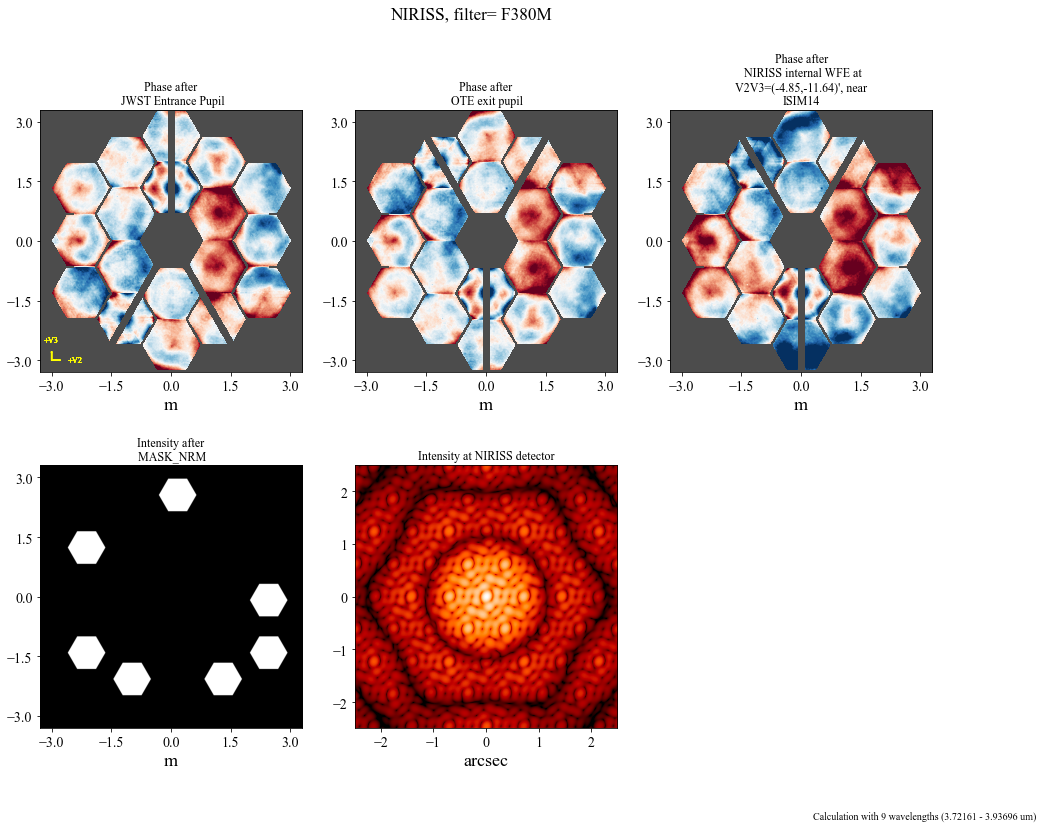

In [19]:
plt.figure(figsize=(16, 12))
psf = niriss.calc_psf(display=True)

In [99]:
optsys = niriss.get_optical_system(fft_oversample=2, fov_arcsec=5)
webbpsf_out, webbpsf_intermediates = optsys.propagate(optsys.input_wavefront(3.8e-6), return_intermediates=True)
# y = [webbpsf_intermediates[i].amplitude for i in range(5)]

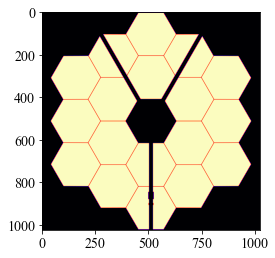

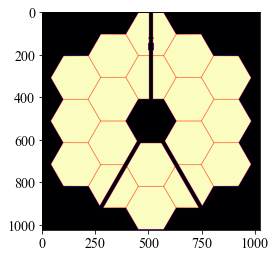

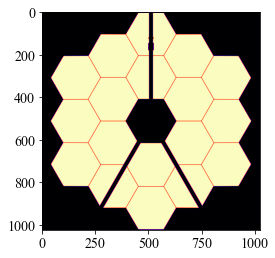

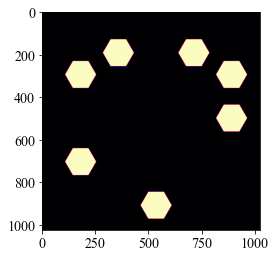

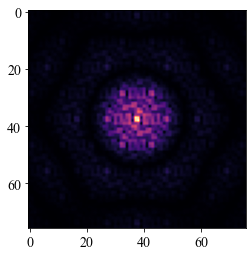

In [100]:
for _y in y:
    plt.figure()
    plt.imshow(_y, cmap="magma")

In [101]:
x.shape

(107, 107)

(-0.5, 151.5, 151.5, -0.5)

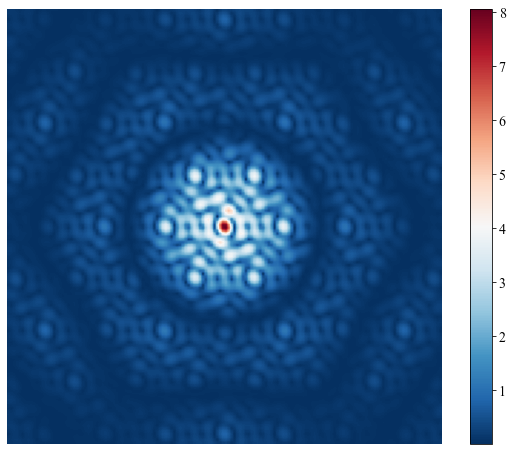

In [102]:
import matplotlib
from astropy.visualization import ImageNormalize, LogStretch, SqrtStretch
from matplotlib.colors import SymLogNorm
plt.figure(figsize=(10, 8))
cmap = matplotlib.cm.get_cmap("RdBu_r").copy()
cmap.set_bad('black')
index = -1
x = webbpsf_intermediates[index].amplitude
# x[~webbpsf_intermediates[1].amplitude.astype(bool)] = np.nan
plt.imshow(x / np.pi, cmap=cmap)
plt.colorbar()
plt.axis("off")